



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART A Section I       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\
  

In [0]:
!pip install tensorflow
!pip install tensorflow-gpu


In [0]:
# Importation of libraries (incuding tensorflow)
import tensorflow as tf
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# loadData is a function which takes as input a list of 2 classes.
# Those 2 classes represent the 2 types of classification in our clossifier.
def loadData(class_choice):
  # import the Fashion MNIST dataset
  fashion_mnist = tf.keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  
  # The different types of classes in the dataset at their corresponding index emplacement.
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  
  # selection of the 2 indexes which will be used for our classification based on their names given in the input list
  index_1= class_names.index(class_choice[0])
  index_2= class_names.index(class_choice[1])

  # selection of train images and labels given the 2 classes selected
  train_index = (train_labels==index_1) | (train_labels==index_2)
  select_train_images = train_images[train_index]
  select_train_labels = train_labels[train_index]

  # selection of test images and labels given the 2 classes selected
  test_index = (test_labels==index_1) | (test_labels==index_2)
  select_test_images = test_images[test_index]
  select_test_labels = test_labels[test_index]

  # the selected images (train and test) are normalized by dividing by 255.
  # since pixel values are between 0 to 255 
  select_train_images = select_train_images / 255.0
  select_test_images = select_test_images / 255.0
  
  # Shaping the train labels into an array of 1 row and map the values of the selected classes
  # to 0 and 1.
  # Here, the 1st class is set to the value 0 and the 2nd class is set to the value 1
  select_train_labels = select_train_labels.reshape(1,-1)
  select_train_labels[select_train_labels==index_1] = 0
  select_train_labels[select_train_labels==index_2] = 1

  # Shaping the test labels into an array of 1 row and map the values of the selected classes
  # to 0 and 1.
  # Here, the 1st class is set to the value 0 and the 2nd class is set to the value 1
  # Just like for the train labels
  select_test_labels = select_test_labels.reshape(1,-1)
  select_test_labels[select_test_labels==index_1] = 0
  select_test_labels[select_test_labels==index_2] = 1

  # Reshaping the train and test images to get each image in one row
  select_train_images = select_train_images.reshape(select_train_images.shape[0],-1)
  select_test_images = select_test_images.reshape(select_test_images.shape[0],-1)

  # Transpose train and test images to get a dimension as: classes * number of instances
  select_train_images = select_train_images.T
  select_test_images = select_test_images.T
  
  # returning the train/test images and labels
  return select_train_images, select_train_labels, select_test_images, select_test_labels



In [0]:
# neuron_layer is a function which describes the operation done at neuron level 
# for each feature with a specific weight W and bias b.
# A selection of the activation function is also done for for each neurons layer (Here either relu or sigmoid)
# The inputs are :
#   X = the input data to be processed
#   n_neuron = the number of neurons in the layer
#   name = the name of the layer
#   activation = the nactivation function to be inserted after the pre activation values (the activation function is optional)
# The output is the logits after activation (ar without activation)
def neuron_layer(X,n_neurons,name,activation=None):
  # A scope is created for each neurons layer.
  with tf.name_scope(name):
    # The matrix of weight for each feature is created and initialized
    W=tf.get_variable(name,[n_neurons, int(X.shape[0])],initializer= tf.glorot_uniform_initializer(seed=1))
    # The matrix of bias for each feature is created and initialized
    bias_name = name+"_bias"
    b=tf.Variable(tf.zeros([n_neurons,1]),name=bias_name)
    
    # we will mutliply each training data by the weights and add bias
    pred=tf.add(tf.matmul(W,X),b)
    
    # Pipe eventually the results through an activiation function (relu, sigmoid, or none)
    if activation=="relu":
      return tf.nn.relu(pred)
    if activation=="sigmoid":
      return tf.sigmoid(pred)
    else:
      return pred

In [0]:
# We reset all graph 
tf.reset_default_graph()

### Initial settings of the graph:
#    n_neurons_1: number of neurons at layer 1 
#    n_neurons_2: number of neurons at layer 2 
#    learning_rate:  Learning rate for the Gradient Descent algorithm 
#    num_iterations:  Number of iterations to be performed to run the Gradient Descent algorithm 
#    class_choices: The 2 classes selected to run our binary classification 
n_neurons_1 = 100
n_neurons_2 = 1
learning_rate = 0.01
num_iterations = 100
class_choices = ['Coat','Sneaker']



### Construction of the graph:

# Image and Test data/labels are loaded with the loadData function (see the loadData function)
tr_x, tr_y, te_x, te_y = loadData(class_choices)

# Placeholder construction: we specify the shape of the training/test images (X) and labels (y)
# Number of column in the placeholder is None (unspecified) since number of instances may vary between training and test data
X = tf.placeholder(tf.float32,[tr_x.shape[0],None],name="X")
y = tf.placeholder(tf.float32,[1,None],name="y")

# Neuronal Network construction and scope
with tf.name_scope("neuronal_net"):
  # 1st layer of neurons taking the data as input, with 100 neurons and with the relu activation function
  layer1 = neuron_layer(X,n_neurons_1,"layer1",activation="relu")
  # 2nd layer is the data after the 1st layer without activation function and which will be used for the cross entropy calculation
  layer2 = neuron_layer(layer1,n_neurons_2,"layer2")
  # logits is the neurons layer taking the 1st layer output as input, with 1 neuron and with the sigmoid activation function
  logits = neuron_layer(layer1,n_neurons_2,"out2",activation="sigmoid")

# Loss/cross entropy calculation construction and scope
with tf.name_scope("loss"):
  # Calculate the cross entropy error for all training data
  x_entropy= tf.nn.sigmoid_cross_entropy_with_logits(logits=layer2, labels=y)
  # Calculate the mean cross entropy error
  loss=tf.reduce_mean(x_entropy,name="avg_xentropy")

# Training construction and scope  
with tf.name_scope("train"):    
  # The Gradient Decent is used as our training model. The aim is to minimize the cross entropy mean error
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Accuracy calculation and scope  
with tf.name_scope("accuracy"): 
  # Round the predictions by the logistical unit to either 1 or 0
  predictions = tf.round(logits)
  # Check if the model prediction is correct (True if prediction correct, False otherwise)
  correct = tf.equal(predictions, y)
  # Conversion of the boolean array into a numerical array (1 if True, 0 if False)
  pred_correct = tf.cast(correct,tf.float32)
  # mean value of predictions_correct
  accuracy = tf.reduce_mean(pred_correct)


In [0]:
# Display of the training result according to the number of step
display_step = 1

# Array to store result of loss and accuracy depending of the epoch iteration for train and test data
it_result_train = []
it_result_test = []

### Start training session 
with tf.Session() as sess:
  # Initialize all variables
  sess.run(tf.global_variables_initializer())
  
  feed_test = {X: te_x, y: te_y}
  # Iterate num_iterations times the training process using the gradient descent optimizer
  for i in range(num_iterations):
    # training data to be feed in the placeholder
    feed_train= {X: tr_x, y: tr_y}
    # Run the session 
    sess.run(train_step, feed_dict=feed_train)
    # Current training loss and accuracy calculation
    currentLoss, train_accuracy = sess.run([loss, accuracy], feed_train)
    it_result_train.append([i, currentLoss, train_accuracy])
    
    # Current test loss and accuracy calculation
    currentLoss, train_accuracy = sess.run([loss, accuracy], feed_test)
    it_result_test.append([i, currentLoss, train_accuracy])
    
    # current loss and accurcy display
    if i% display_step== 0:
      print('Iteration: ', i,' Loss: ', currentLoss, ' Accuracy: ',train_accuracy)
  
  # calculate accuracy on the test data
  feed_test= {X: te_x, y: te_y}
  print('Test Accuracy: ', sess.run(accuracy, feed_test))

Iteration:  0  Loss:  0.6411167  Accuracy:  0.6365
Iteration:  1  Loss:  0.5924513  Accuracy:  0.6855
Iteration:  2  Loss:  0.55284774  Accuracy:  0.734
Iteration:  3  Loss:  0.5191997  Accuracy:  0.78
Iteration:  4  Loss:  0.48980683  Accuracy:  0.827
Iteration:  5  Loss:  0.46362454  Accuracy:  0.8615
Iteration:  6  Loss:  0.43999818  Accuracy:  0.898
Iteration:  7  Loss:  0.41847274  Accuracy:  0.925
Iteration:  8  Loss:  0.39872694  Accuracy:  0.941
Iteration:  9  Loss:  0.380546  Accuracy:  0.954
Iteration:  10  Loss:  0.36374518  Accuracy:  0.968
Iteration:  11  Loss:  0.34816873  Accuracy:  0.9755
Iteration:  12  Loss:  0.33369786  Accuracy:  0.9785
Iteration:  13  Loss:  0.32023382  Accuracy:  0.9815
Iteration:  14  Loss:  0.3076737  Accuracy:  0.984
Iteration:  15  Loss:  0.2959411  Accuracy:  0.9865
Iteration:  16  Loss:  0.28495696  Accuracy:  0.988
Iteration:  17  Loss:  0.27465442  Accuracy:  0.991
Iteration:  18  Loss:  0.26497674  Accuracy:  0.9915
Iteration:  19  Loss: 

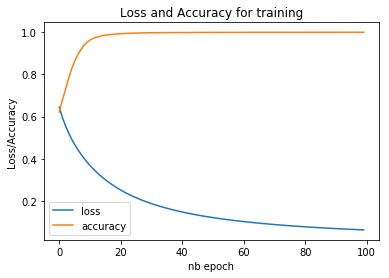

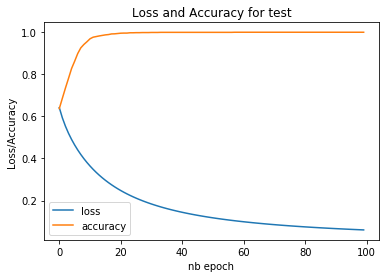

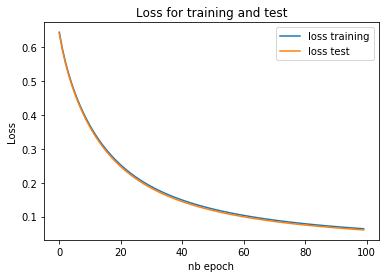

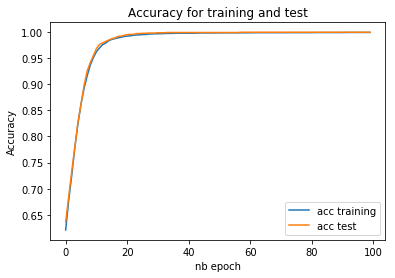

In [0]:
  # Plot Loss and Accuracy for training
  fig, ax = plt.subplots()
  ax.plot(np.arange(num_iterations), np.array(it_result_train)[:,1].astype(float), label='loss')
  ax.plot(np.arange(num_iterations), np.array(it_result_train)[:,2].astype(float), label='accuracy')
  plt.title('Loss and Accuracy for training')
  plt.xlabel('nb epoch')
  plt.ylabel('Loss/Accuracy')
  ax.legend()
  plt.show()

  # Plot Loss and Accuracy for test
  fig, ax = plt.subplots()
  ax.plot(np.arange(num_iterations), np.array(it_result_test)[:,1].astype(float), label='loss')
  ax.plot(np.arange(num_iterations), np.array(it_result_test)[:,2].astype(float), label='accuracy')
  plt.title('Loss and Accuracy for test')
  plt.xlabel('nb epoch')
  plt.ylabel('Loss/Accuracy')
  ax.legend()
  plt.show()
  
  # Plot Loss for test and training
  fig, ax = plt.subplots()
  ax.plot(np.arange(num_iterations), np.array(it_result_train)[:,1].astype(float), label='loss training')
  ax.plot(np.arange(num_iterations), np.array(it_result_test)[:,1].astype(float), label='loss test')
  plt.title('Loss for training and test')
  plt.xlabel('nb epoch')
  plt.ylabel('Loss')
  ax.legend()
  plt.show()
  
  # Plot Accuracy for test and training
  fig, ax = plt.subplots()
  ax.plot(np.arange(num_iterations), np.array(it_result_train)[:,2].astype(float), label='acc training')
  ax.plot(np.arange(num_iterations), np.array(it_result_test)[:,2].astype(float), label='acc test')
  plt.title('Accuracy for training and test')
  plt.xlabel('nb epoch')
  plt.ylabel('Accuracy')
  ax.legend()
  plt.show()

